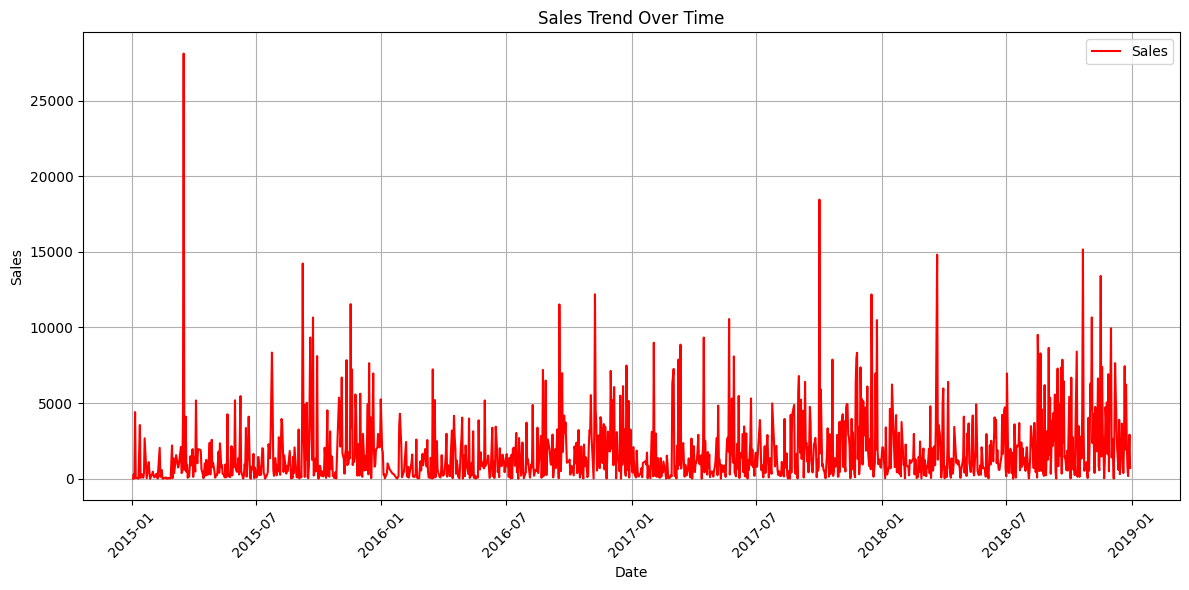

RMSE: 734.63


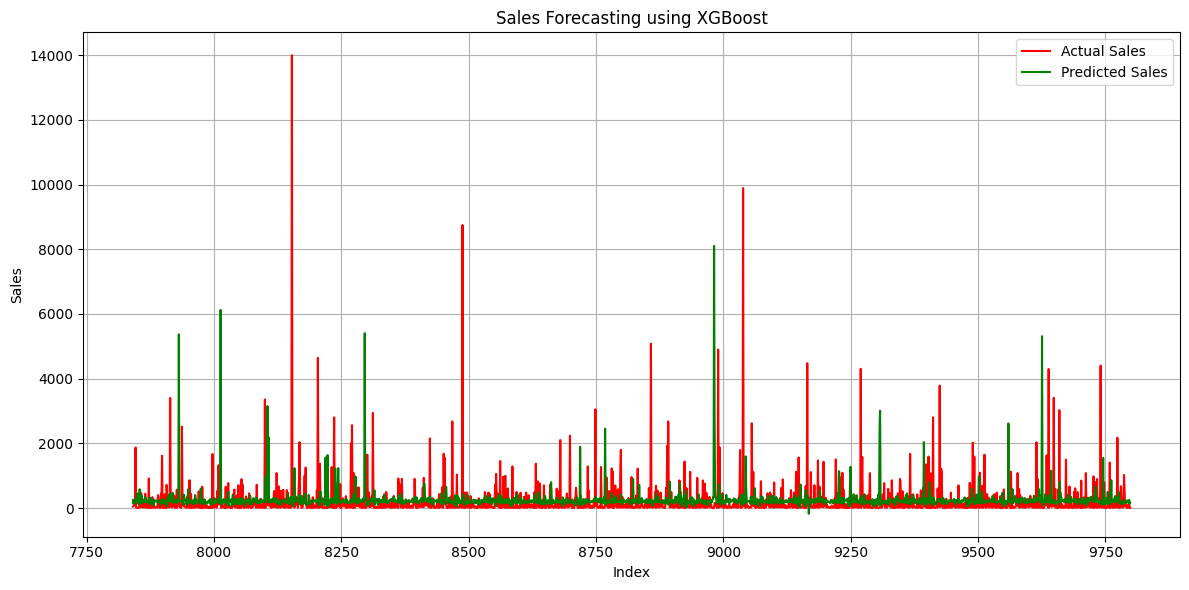

In [1]:
# sales_forecasting.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = r'C:\Users\aditi mishra\Downloads\train.csv'  # Make sure train.csv is in the same directory
data = pd.read_csv(file_path)

# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

# Group sales by order date
sales_by_date = data.groupby('Order Date')['Sales'].sum().reset_index()

# Plot sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date['Order Date'], sales_by_date['Sales'], label='Sales', color='red')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Function to create lag features
def create_lagged_features(data, lag=1):
    lagged_data = data.copy()
    for i in range(1, lag + 1):
        lagged_data[f'lag_{i}'] = lagged_data['Sales'].shift(i)
    return lagged_data

# Generate lag features
lag = 5
sales_with_lags = create_lagged_features(data[['Order Date', 'Sales']], lag)

# Drop missing values caused by shifting
sales_with_lags = sales_with_lags.dropna()

# Split data into features and target
X = sales_with_lags.drop(columns=['Order Date', 'Sales'])
y = sales_with_lags['Sales']

# Train-test split (no shuffle due to time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize XGBoost Regressor
model_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5
)
model_xgb.fit(X_train, y_train)

# Predict on test data
predictions_xgb = model_xgb.predict(X_test)

# Calculate RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, predictions_xgb))
print(f"RMSE: {rmse_xgb:.2f}")

# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Sales', color='red')
plt.plot(y_test.index, predictions_xgb, label='Predicted Sales', color='green')
plt.title('Sales Forecasting using XGBoost')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
print(f"Average daily sales: {sales_by_date['Sales'].mean():.2f}")


Average daily sales: 1838.65
